##Bitcoin Historical Data Analysis


Bitcoin is the longest running and most well known cryptocurrency, first released as open source in 2009 by the anonymous Satoshi Nakamoto. Bitcoin serves as a decentralized medium of digital exchange, with transactions verified and recorded in a public distributed ledger (the blockchain) without the need for a trusted record keeping authority or central intermediary. Transaction blocks contain a SHA-256 cryptographic hash of previous transaction blocks, and are thus "chained" together, serving as an immutable record of all transactions that have ever occurred. As with any currency/commodity on the market, bitcoin trading and financial instruments soon followed public adoption of bitcoin and continue to grow. Included [here](https://www.kaggle.com/mczielinski/bitcoin-historical-data) is historical bitcoin market data at 1-min intervals for select bitcoin exchanges where trading takes place. 


This data is for select bitcoin exchanges for the time period of Jan 2012 to December 2020, with minute to minute updates of OHLC (Open, High, Low, Close), Volume in BTC and indicated currency, and weighted bitcoin price. Timestamps are in Unix time. Timestamps without any trades or activity have their data fields populated with NaNs. If a timestamp is missing, or if there are jumps, this may be because the exchange (or its API) was down, the exchange (or its API) did not exist, or some other unforseen technical error in data reporting or gathering.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing dataset
bitcoin_data = pd.read_csv('/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv') 

In [4]:
#printing the first ten rows
bitcoin_data.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#printing the last ten rows
bitcoin_data.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4727767,1609372260,28836.97,28849.67,28807.78,28826.52,2.051917,59173.965272,28838.376450
4727768,1609372320,28826.49,28844.25,28816.09,28816.09,0.721410,20803.457100,28837.207539
4727769,1609372380,28814.36,28822.71,28800.00,28800.00,1.529671,44076.572351,28814.411945
4727770,1609372440,28800.00,28832.79,28800.00,28831.35,2.036450,58675.679644,28812.732950
4727771,1609372500,28809.07,28825.50,28800.01,28810.08,0.087391,2517.799582,28810.597267
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831
4727776,1609372800,28893.21,28928.49,28893.21,28928.49,5.757679,166449.709320,28909.166061


In [6]:
#general information on dataset
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4727777 entries, 0 to 4727776
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 288.6 MB


In [7]:
#checking for missing values in the columns
bitcoin_data.isnull().sum()

Timestamp                  0
Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64

In [8]:
#summary statistics of the columns
bitcoin_data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.727777e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06,3.484305e+06
mean,1.467409e+09,4.570658e+03,4.573721e+03,4.567413e+03,4.570624e+03,9.422676e+00,3.315691e+04,4.570625e+03
std,8.203749e+07,4.775105e+03,4.778620e+03,4.771352e+03,4.775094e+03,3.101255e+01,1.129107e+05,4.775090e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.396235e+09,4.321900e+02,4.324300e+02,4.320000e+02,4.322000e+02,3.917811e-01,4.147936e+02,4.321753e+02
50%,1.467540e+09,3.085010e+03,3.093250e+03,3.078010e+03,3.084410e+03,1.936719e+00,3.305199e+03,3.085478e+03
75%,1.538456e+09,8.158010e+03,8.162850e+03,8.152790e+03,8.157310e+03,7.299825e+00,2.158297e+04,8.157964e+03
max,1.609373e+09,2.899738e+04,2.901032e+04,2.896366e+04,2.899738e+04,5.853852e+03,1.044599e+07,2.898589e+04


From the methods applied to the bitcoin dataframe, It can be observed that this dataset contains 4727777 rows and 8 columns. The data has null values containing about 27% of its entries. 

These rows will be dropped in the analysis as they indicate that there was no trade or activity for that 1 -minute time interval. The mean volume of BTC traded over the 1-minute time interval period of January 2012 to October 2017 is 9.422BTC.

The Timestamp column which is in Unix Time, will be converted to datetime format in Python. 


In [9]:
#dropping null values
bitcoin_data = bitcoin_data.dropna()

In [10]:
bitcoin_data.isnull().sum()

Timestamp            0
Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [11]:
#converting the Timestamp column to datetime format

import datetime
bitcoin_data['Timestamp'] = bitcoin_data['Timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d %H:%M:%S'))


In [12]:
bitcoin_data['Timestamp'] = pd.to_datetime(bitcoin_data['Timestamp'])


In [13]:
bitcoin_data.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
dtype: object

In [14]:
bitcoin_data = bitcoin_data.set_index('Timestamp')

In [15]:
bitcoin_data.tail(20)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2020-12-30 23:41:00,28868.04,28883.67,28855.42,28855.42,0.466457,13471.564282,28880.630730
2020-12-30 23:42:00,28866.78,28881.57,28866.78,28872.60,3.275535,94595.423283,28879.380747
2020-12-30 23:43:00,28882.50,28882.50,28858.33,28859.11,0.736792,21263.147175,28859.108745
2020-12-30 23:44:00,28860.66,28880.96,28842.65,28847.17,0.299203,8634.067686,28856.848249
2020-12-30 23:45:00,28838.89,28874.04,28822.61,28850.28,1.497298,43190.799102,28845.828559
2020-12-30 23:46:00,28880.00,28894.20,28867.14,28886.15,6.004953,173422.674680,28879.940696
2020-12-30 23:47:00,28883.69,28899.84,28877.23,28880.39,0.935234,27013.439712,28884.159258
2020-12-30 23:48:00,28871.54,28877.63,28831.16,28844.48,0.889523,25669.318596,28857.404737
2020-12-30 23:49:00,28844.56,28853.38,28809.24,28809.24,1.517480,43761.571934,28838.324830


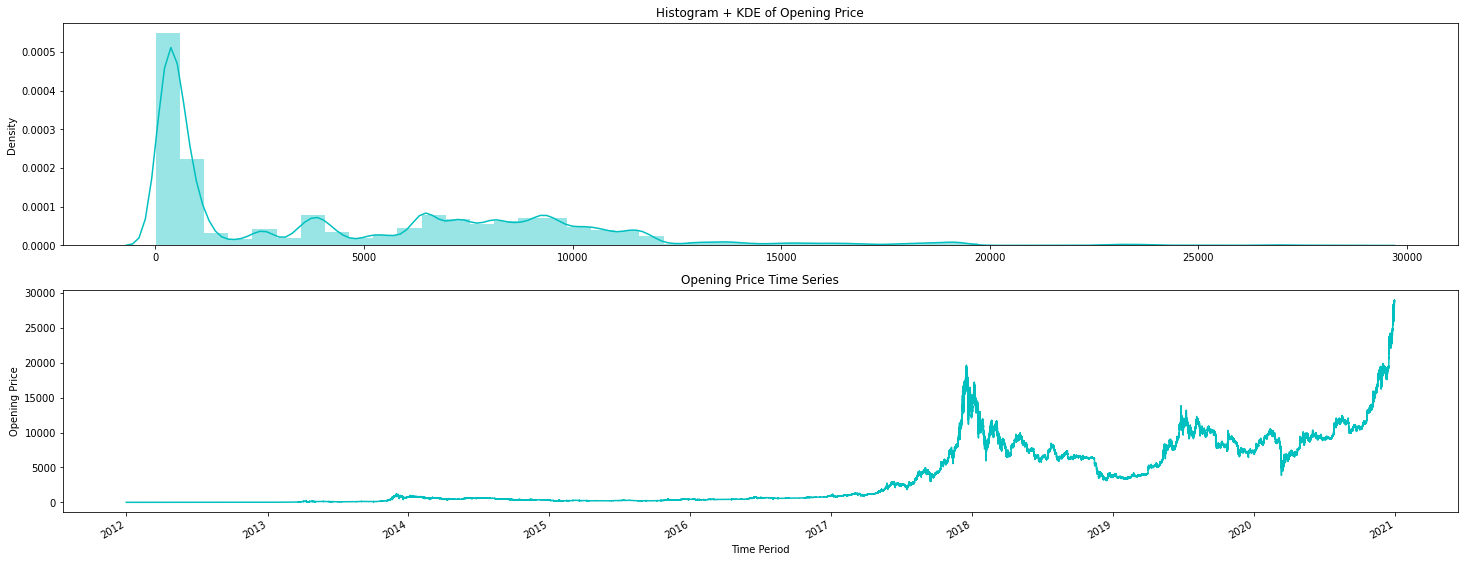

In [16]:
#opening price
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Open'], ax=ax[0],color='c')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Opening Price')
bitcoin_data['Open'].plot(ax=ax[1], color='c')
ax[1].set_title('Opening Price Time Series')
ax[1].set(ylabel='Opening Price', xlabel='Time Period')
plt.savefig('open.png', dpi=300)
plt.show()

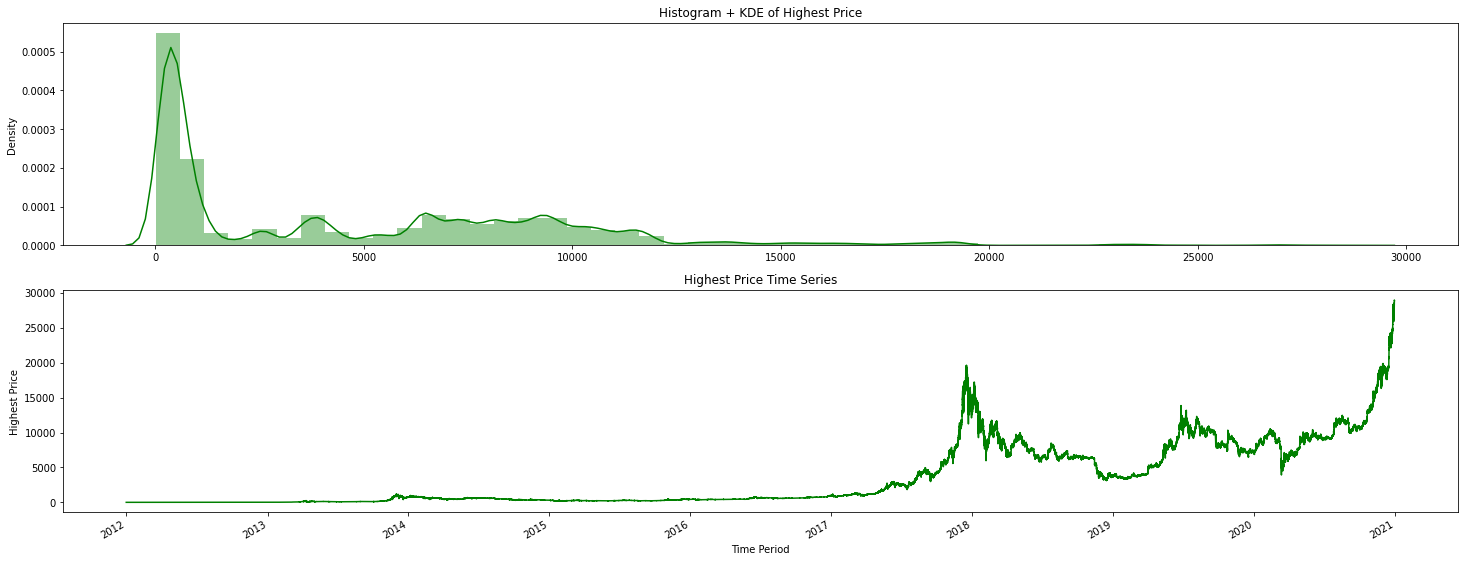

In [17]:
#highest price
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['High'], ax=ax[0],color='g')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Highest Price')
bitcoin_data['High'].plot(ax=ax[1], color='g')
ax[1].set_title('Highest Price Time Series')
ax[1].set(ylabel='Highest Price', xlabel='Time Period')
plt.savefig('high.png', dpi=300)
plt.show()

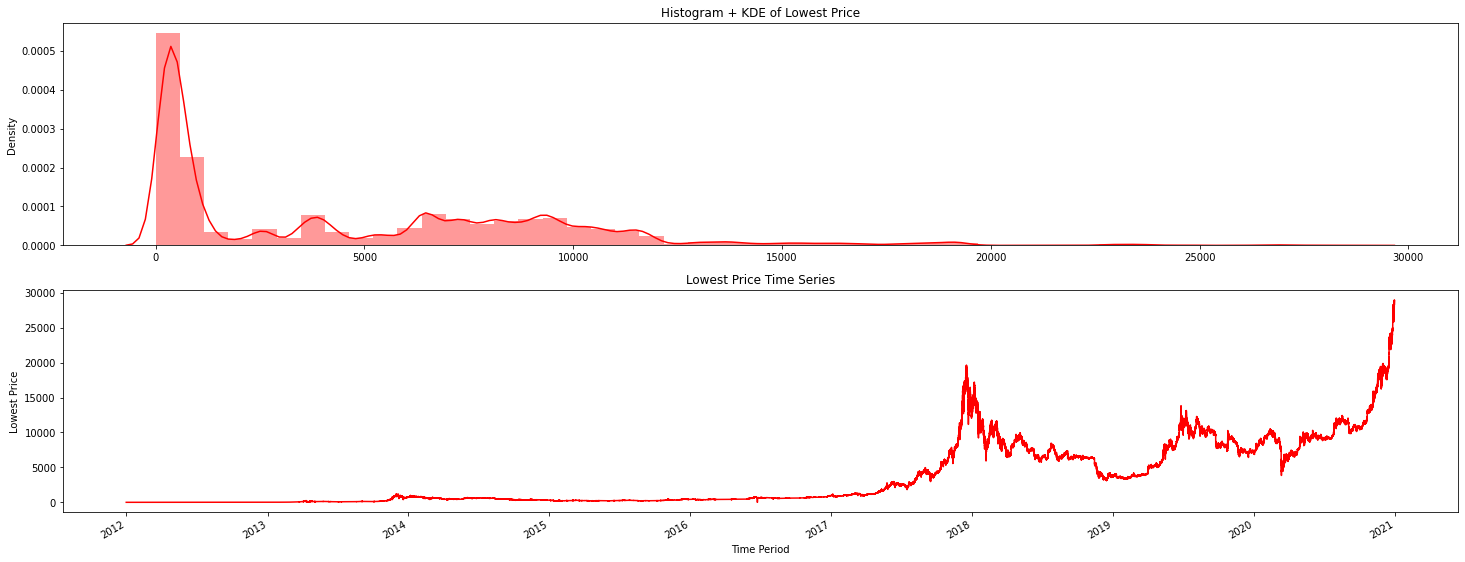

In [18]:
#lowest price
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Low'], ax=ax[0],color='r')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Lowest Price')
bitcoin_data['Low'].plot(ax=ax[1], color='r')
ax[1].set_title('Lowest Price Time Series')
ax[1].set(ylabel='Lowest Price', xlabel='Time Period')
plt.savefig('low.png', dpi=300)
plt.show()

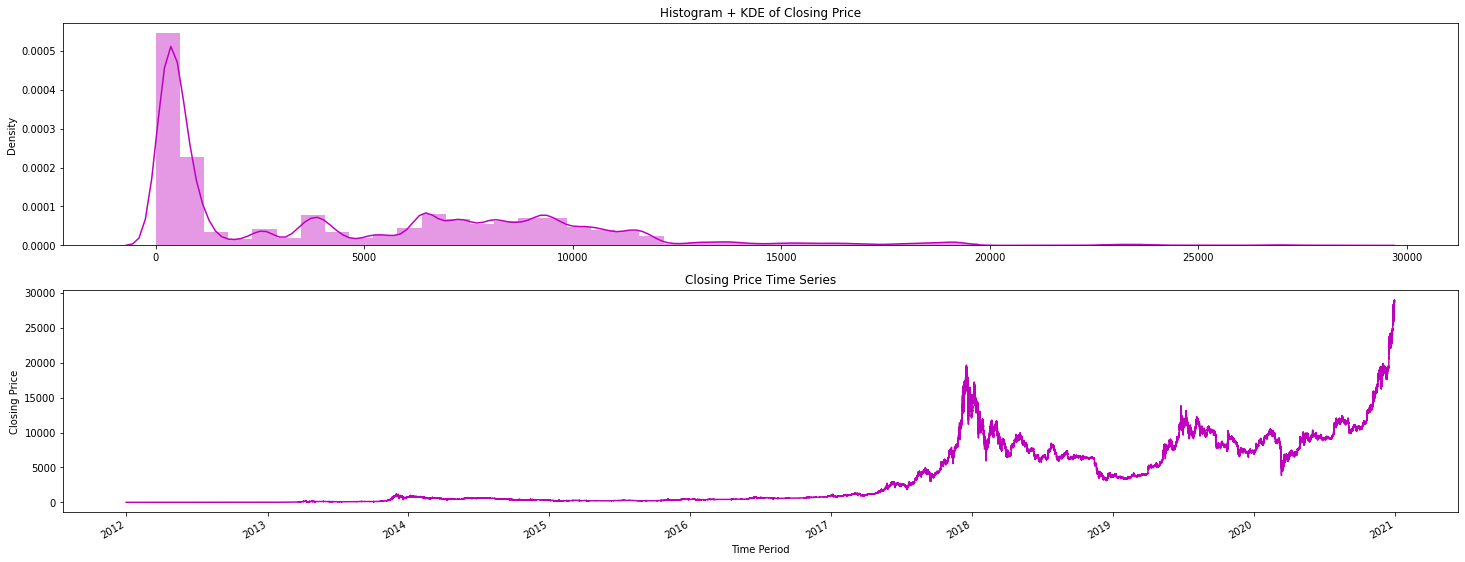

In [19]:
#closing price
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Close'], ax=ax[0],color='m')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Closing Price')
bitcoin_data['Open'].plot(ax=ax[1], color='m')
ax[1].set_title('Closing Price Time Series')
ax[1].set(ylabel='Closing Price', xlabel='Time Period')
plt.savefig('close.png', dpi=300)
plt.show()

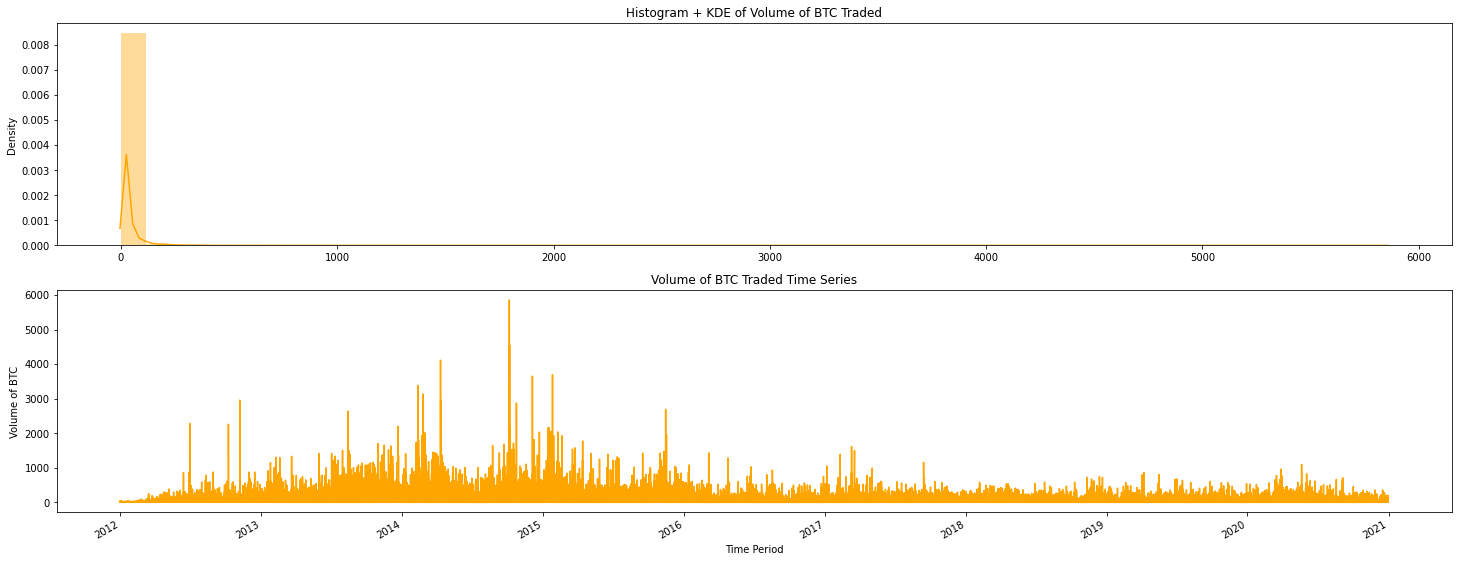

In [20]:
#Volume_(BTC) 
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Volume_(BTC)'], ax=ax[0],color='orange')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Volume of BTC Traded')
bitcoin_data['Volume_(BTC)'].plot(ax=ax[1], color='orange')
ax[1].set_title('Volume of BTC Traded Time Series')
ax[1].set(ylabel='Volume of BTC', xlabel='Time Period')
plt.savefig('btc.png', dpi=300)
plt.show()


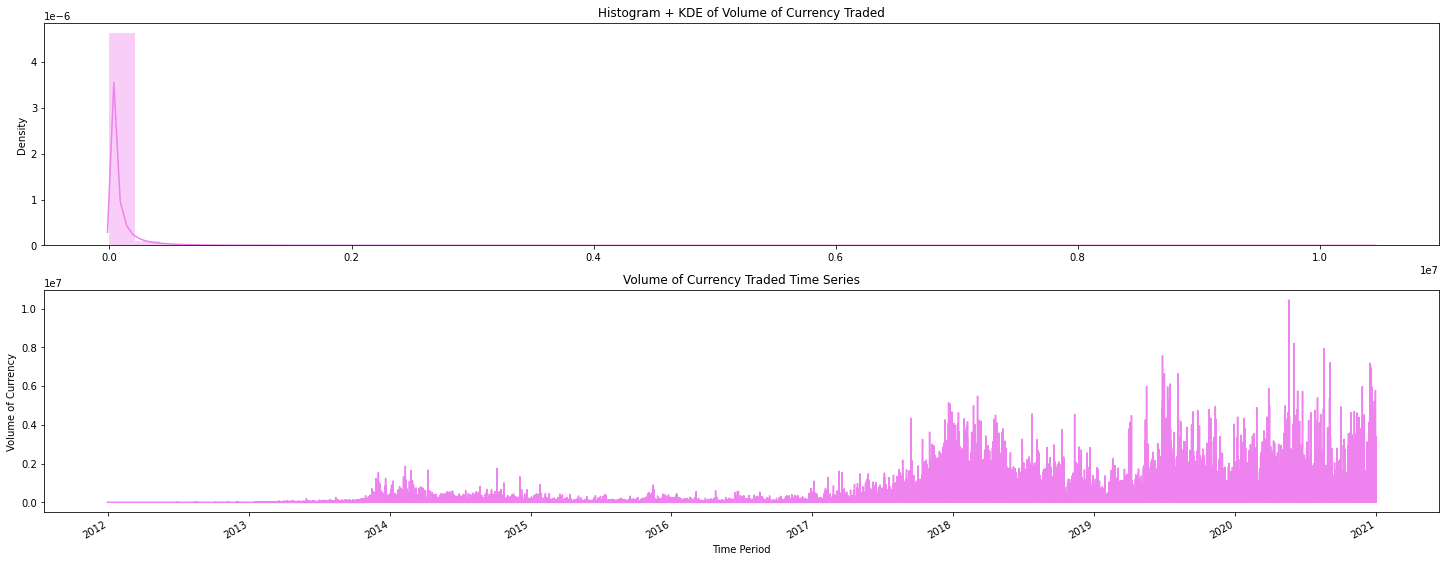

In [21]:
#Volume of Currency Traded 
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Volume_(Currency)'], ax=ax[0],color='violet')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of Volume of Currency Traded')
bitcoin_data['Volume_(Currency)'].plot(ax=ax[1], color='violet')
ax[1].set_title('Volume of Currency Traded Time Series')
ax[1].set(ylabel='Volume of Currency', xlabel='Time Period')
plt.savefig('curr.png', dpi=300)
plt.show()


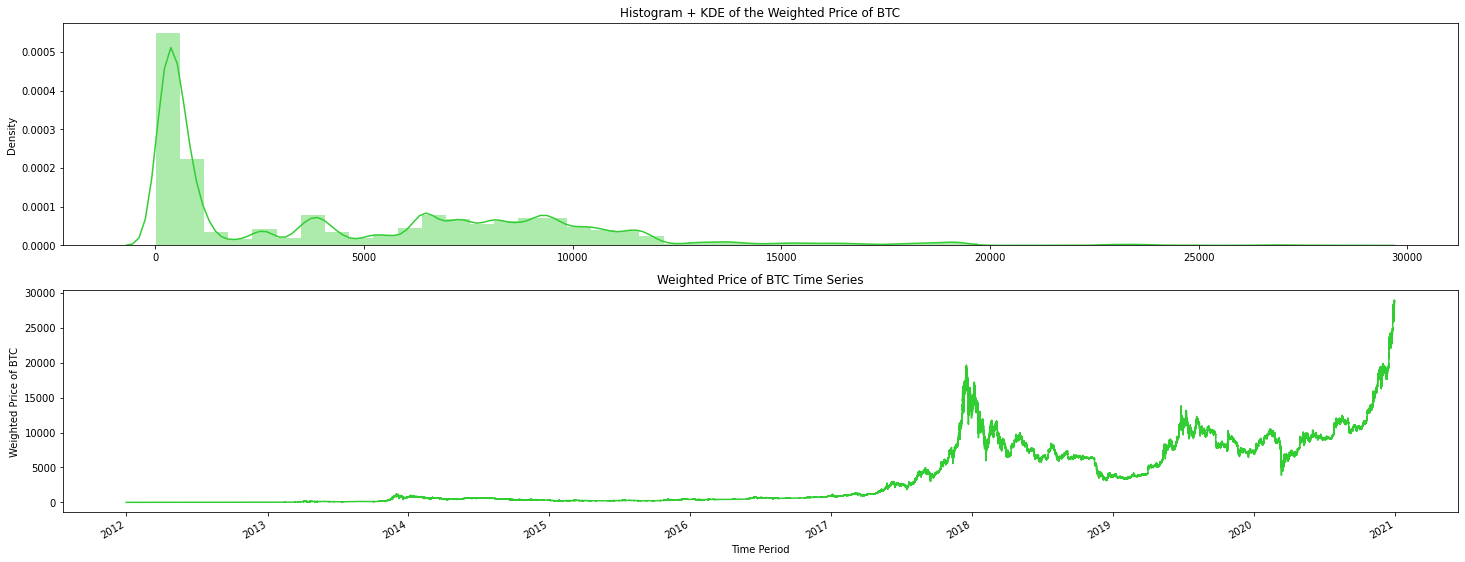

In [22]:
#Weighted Price of BTC 
fig, ax = plt.subplots(2,1,figsize=(25,10),sharex=False)
sns.distplot(x=bitcoin_data['Weighted_Price'], ax=ax[0],color='limegreen')
ax[0].set(xlabel=None)
ax[0].set_title('Histogram + KDE of the Weighted Price of BTC')
bitcoin_data['Weighted_Price'].plot(ax=ax[1], color='limegreen')
ax[1].set_title('Weighted Price of BTC Time Series')
ax[1].set(ylabel='Weighted Price of BTC', xlabel='Time Period')
plt.savefig('price.png', dpi=300)
plt.show()


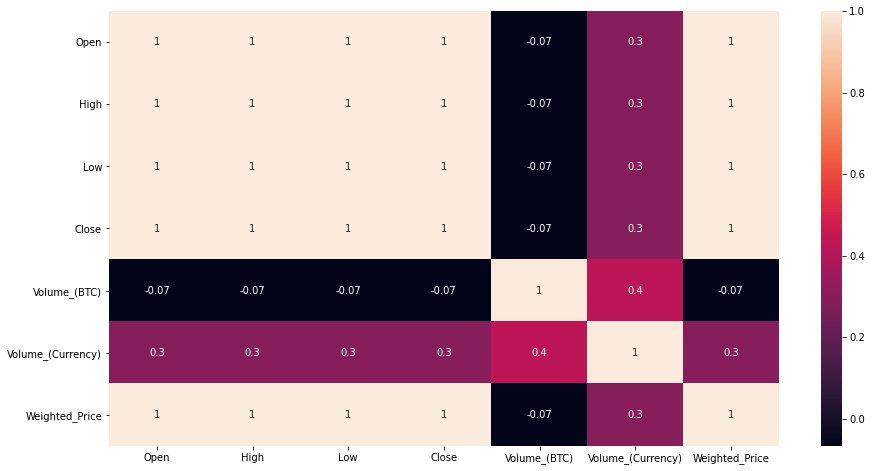

In [23]:
#correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(bitcoin_data.corr(), annot = True, fmt='.1g')
plt.savefig('corr.png', dpi=300)
plt.show()

In [24]:
#create new column Diff_Price
bitcoin_data["Diff_Price"] = bitcoin_data["High"] - bitcoin_data["Low"]

In [25]:
bitcoin_data['Diff_Price'].max()

850.0

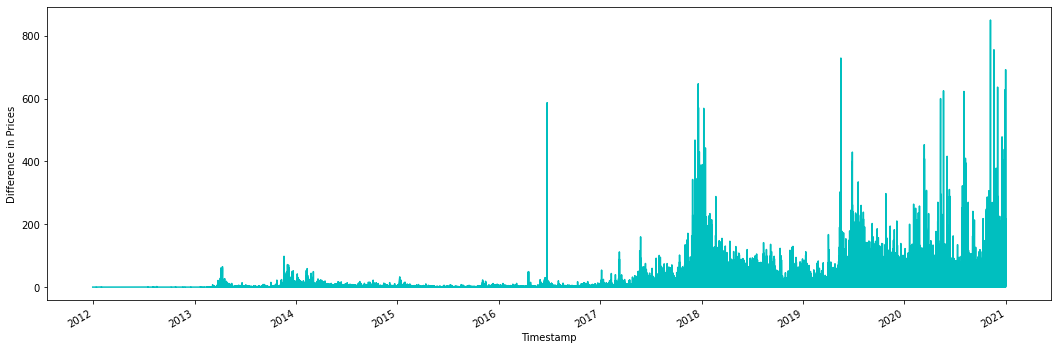

In [26]:
bitcoin_data['Diff_Price'].plot(color='c', figsize=(18,6))
plt.ylabel('Difference in Prices')
plt.savefig('diff.png', dpi=300)
plt.show()

In [27]:
bitcoin_data[bitcoin_data['Diff_Price'] == 850.0 ]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Diff_Price
Timestamp,,,,,,,,
2020-11-05 17:33:00,14950.0,14950.0,14100.0,14857.24,321.644792,4.690541e+06,14582.983941,850.0


In [29]:
bitcoin_data['Volume_(BTC)'].max()

5853.8521659

In [30]:
bitcoin_data[bitcoin_data['Volume_(BTC)'] == bitcoin_data['Volume_(BTC)'].max() ]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Diff_Price
Timestamp,,,,,,,,
2014-10-05 15:46:00,306.86,306.86,294.0,299.38,5853.852166,1.761476e+06,300.908833,12.86


In [31]:
bitcoin_data['Volume_(Currency)'].max()

10445987.794

In [33]:
bitcoin_data[bitcoin_data['Volume_(Currency)'] == bitcoin_data['Volume_(Currency)'].max()]

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Diff_Price
Timestamp,,,,,,,,
2020-05-20 15:15:00,9724.89,9724.89,9100.0,9685.57,1098.349384,1.044599e+07,9510.6238,624.89
